In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def areSame(A,B,n):
    for i in range(n):
        if (A[i][0] != B[i][0]):
            return 0
    return 1

x = np.array([[1,4],[4,3],[4,5],[3,6],[6,7],[3,3],[2,5],[2,2],[2,3]])
c = np.array([[5,3],[1,3],[3,4]])

same = 0
last = np.zeros((x.shape[0],1))
itera = 0
while same == 0:
    #find distances from all values at all centroids
    matrix_new = np.zeros((x.shape[0],c.shape[0]))
    for i in range(c.shape[0]):
        for k in range(x.shape[0]):
            dist = 0
            for l in range(x.shape[1]):
                dist = dist + (x[k,l] - c[i,l])**2
            matrix_new[k,i] = np.sqrt(dist)

    #recalculate the centroids
    index = np.zeros((x.shape[0],1))
    c = np.zeros((c.shape[0],c.shape[1]))
    cont = np.zeros((c.shape[0],1))
    for i in range(x.shape[0]):
        q = np.argmin(matrix_new[i,:])
        index[i,0] = q
        for l in range(c.shape[0]):
            if q == l:
                cont[l,0] += 1
                for j in range(x.shape[1]):
                    c[q,j] = c[q,j] + x[i,j]
    for i in range(c.shape[0]):
        for j in range(c.shape[1]):
            c[i,j] = c[i,j]/cont[i,0]
        
    same = areSame(index,last,x.shape[0])
    last = index
    itera += 1

for i in range(c.shape[0]):   
    print('Centroid ' + str(i) + ': ' + str(c[i,:]))
print('Number of iterations:', itera)

Centroid 0: [6. 7.]
Centroid 1: [2. 3.]
Centroid 2: [3.25 4.75]
Number of iterations: 4


A)


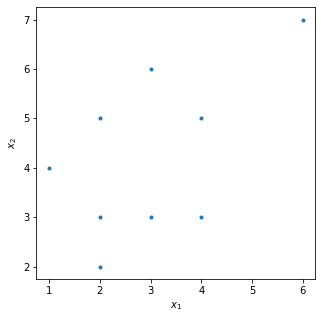

In [117]:
print('A)')
fig = plt.figure(figsize=(5,5))
plt.plot(x[:,0],x[:,1], '.')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [118]:
print('C)')

c = np.array([[5,3],[1,3],[3,4]])
km = KMeans(n_clusters=3, init=c, verbose=1)
km.fit_predict(x)

for i in range(0,3):
    print('Centroid %d: (%1.2f, %1.2f)' % (i,km.cluster_centers_[i][0],km.cluster_centers_[i][1]))

C)
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 19.416666666666668
start iteration
done sorting
end inner loop
Iteration 1, inertia 14.666666666666668
start iteration
done sorting
end inner loop
Iteration 2, inertia 11.5
start iteration
done sorting
end inner loop
Iteration 3, inertia 11.5
center shift 0.000000e+00 within tolerance 2.197531e-04
Centroid 0: (6.00, 7.00)
Centroid 1: (2.00, 3.00)
Centroid 2: (3.25, 4.75)


C:\Users\Anabel\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [119]:
print('D) Foram necessárias', 4, 'iterações para se treinar o modelo. Pode-se conferir na saída do verbose (Iteration 0 - Iteration 3)')

D) Foram necessárias 4 iterações para se treinar o modelo. Pode-se conferir na saída do verbose (Iteration 0 - Iteration 3)


E)


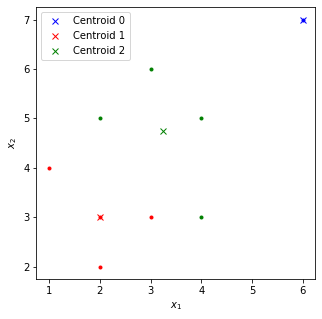

In [120]:
c = np.array([[6.00, 7.00],[2.00, 3.00],[3.25, 4.75]])

matrix_new = np.zeros((x.shape[0],c.shape[0]))
for i in range(c.shape[0]):
    for k in range(x.shape[0]):
        dist = 0
        for l in range(x.shape[1]):
            dist = dist + (x[k,l] - c[i,l])**2
        matrix_new[k,i] = np.sqrt(dist)

#recalculate the centroids
index = np.zeros((x.shape[0],1))
for i in range(x.shape[0]):
    q = np.argmin(matrix_new[i,:])
    index[i,0] = q

print('E)')
idx0 = np.argwhere(index == 0)
idx1 = np.argwhere(index == 1)
idx2 = np.argwhere(index == 2)

fig = plt.figure(figsize=(5,5))
plt.plot(x[idx0[:,0],0], x[idx0[:,0],1], 'b.')
plt.plot(x[idx1[:,0],0], x[idx1[:,0],1], 'r.')
plt.plot(x[idx2[:,0],0], x[idx2[:,0],1], 'g.')
plt.plot(c[0,0],c[0,1], 'bx', label='Centroid 0')
plt.plot(c[1,0],c[1,1], 'rx', label='Centroid 1')
plt.plot(c[2,0],c[2,1], 'gx', label='Centroid 2')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.savefig('distribution_of_centroid', dpi=600)
plt.show()